# Homework 
## 1: Reorganize Linear Regression in Python mode.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

## prediction

In [3]:
def inference(w, b, x):
    return w * x + b

## cost function

In [4]:
def loss_function(w, b, x, gt_y):     
    # calculate the loss vector
    loss = 0.5 * np.power((w * x + b - gt_y), 2)
    # sum the loss element-wise and compute average
    avg_loss = np.average(loss)
    return avg_loss

## gradient calculation

In [5]:
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw_avg = np.average(np.multiply(diff,x)) 
    db_avg = np.average(diff)
    return dw_avg, db_avg

## gradient update (batch size) 

In [6]:
def cal_step_gradient(batch_x, batch_gt_y, w, b, lr):
    pred_y = inference(w, b, batch_x)
    dw_avg, db_avg = gradient(pred_y, batch_gt_y, batch_x)
    w = w - lr * dw_avg
    b = b - lr * db_avg
    return w, b

## data generation

In [28]:
def gen_sample_data():
    w = random.randint(0, 10) + random.random()
    b = random.randint(0, 5) + random.random()
    num_sample = 100
    print(w, b)
    x = np.random.randint(0, 100, num_sample) + random.random()
    y = w * x + b + random.random() * np.random.randint(-100, 100, num_sample)
    return x, y

## training function

In [35]:
def train(x, gt_y, batch_size, lr, max_iter):
    w, b = 0, 0
    num_sample = len(x)
    for _ in range(max_iter):
        batch_index = np.random.choice(len(x), batch_size)
        batch_x = np.array([x[j] for j in batch_index])
        batch_y = np.array([gt_y[j] for j in batch_index])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        print(' w: ', w, ' b: ', b)
        print(' loss: ', loss_function(w, b, x, gt_y))
    return w, b

# validate the Python mode code 

3.198707633791982 0.9780379360380198


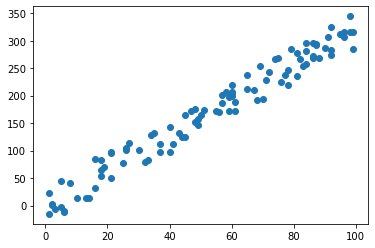

In [37]:
x, y = gen_sample_data()
plt.scatter(x, y)
plt.show()

In [40]:
train(x, y, batch_size=80, lr=0.0001, max_iter=20)

 w:  1.0415324210773924  b:  0.015561993042991202
 loss:  9079.07424235723
 w:  1.7562524075756043  b:  0.026347891388994654
 loss:  4227.78863205837
 w:  2.2404637893140404  b:  0.033129231570674676
 loss:  2012.9592636608734
 w:  2.6262837235805234  b:  0.03880834991926511
 loss:  867.8923945710376
 w:  2.8638441159488703  b:  0.0421113195263167
 loss:  436.25390236455297
 w:  3.034538943520164  b:  0.044305639027807826
 loss:  254.76444174243713
 w:  3.119687992736953  b:  0.04553892623053741
 loss:  204.447403769499
 w:  3.1763534965891527  b:  0.04635982416875219
 loss:  185.79826236414345
 w:  3.2231785574348693  b:  0.04703150108928674
 loss:  179.33435829453407
 w:  3.2169772640525203  b:  0.046958723299663815
 loss:  179.7253021526443
 w:  3.2217464710667207  b:  0.04702939266927033
 loss:  179.41202656938057
 w:  3.235359956292484  b:  0.047070116225248655
 loss:  178.9797605699053
 w:  3.234721159047598  b:  0.04719938997700622
 loss:  178.9847907786881
 w:  3.21396316863619

(3.234944703636168, 0.04754262494137577)

## 2. Reorganize Logistic regression in Python mode.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Generate test data

In [28]:
def data_generate():
    mean1 = [5, 5]
    cov1 = [[1, 0], [0, 10]]
    x1_0, x2_0 = np.random.multivariate_normal(mean1, cov1, 100).T
    mean2 = [5, 20]
    cov2 = [[1, 0], [0, 10]]
    x1_1, x2_1 = np.random.multivariate_normal(mean2, cov2, 100).T
    plt.scatter(x1_0, x2_0)
    plt.scatter(x1_1, x2_1)
    plt.show()
    ## 拼接两组点，并对其打标签
    x1 = np.append(x1_0, x1_1)
    x2 = np.append(x2_0, x2_1)
    x0 = np.ones(200)      ## x0 should be 1, which corresponding to theta0.  
    X = np.vstack((x0,x1,x2))     ## 拼接x0,x1,x2为X矩阵 vstack: vertical stack
    X = X.T
    X = np.matrix(X)
    gt_y = np.append(np.zeros(100), np.ones(100))   ## generate y. 0 represents the blue dots, 1 is the orange dots
    gt_y = np.matrix([gt_y]).T
    return X, gt_y

### data plot

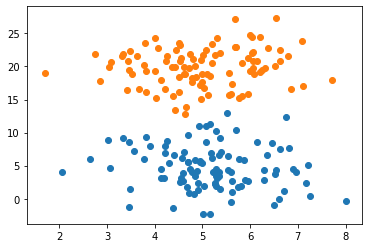

(200, 3)
(200, 1)


In [29]:
X, gt_y = data_generate()
print(X.shape)
print(gt_y.shape)

### sigmoid function
$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

In [30]:
def sigmoid(x):
    return  1 / (1 + np.exp(-x))

### cost function of logistic regression

In [31]:
def cost_function(theta, X, y):# the input argument. X contains (1,x1,x2). the total points are m = 200
    p = sigmoid(X * theta.T)   # PROBABILITY
    J = -np.average(np.multiply(y, np.log(p)) + np.multiply((1 - y), np.log(1 - p)))
    return J

### calculate the gradient vector

In [32]:
def logistic_gradient(pred_y, gt_y, X):
    diff = pred_y - gt_y
    d_theta0_avg = np.average(np.multiply(diff,X[:,0]))
    d_theta1_avg = np.average(np.multiply(diff,X[:,1])) 
    d_theta2_avg = np.average(np.multiply(diff,X[:,2]))
    return np.matrix([[d_theta0_avg, d_theta1_avg, d_theta2_avg]])

### update the parameter vector

In [33]:
def logistic_cal_step_gradient(X, gt_y, theta, lr):
    pred = sigmoid(X * theta.T)
    d_theta = logistic_gradient(pred, gt_y, X)
    theta = theta - lr * d_theta
    return theta

### training function

In [34]:
def logistic_train(X, gt_y, lr, max_iter):
    theta = np.array([[0,0,0]])    ## initialize theta vector
    cost = []
    for _ in range(max_iter):
        theta = logistic_cal_step_gradient(X, gt_y, theta, lr)
        #print(' k: ', -theta[0,1]/theta[0,2], ' b: ', -theta[0,0]/theta[0,2])
        cost.append(cost_function(theta, X, gt_y))
        #print(' cost: ', cost(theta, X, gt_y))
    return theta, cost

### training and show the cost curve

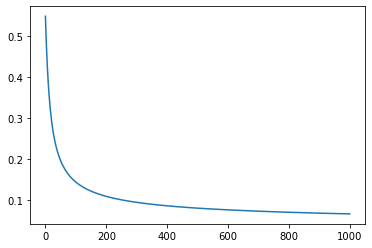

In [35]:
theta, cost = logistic_train(X, gt_y, lr=0.02, max_iter=1000)
plt.plot(cost)
plt.show()

### Result display

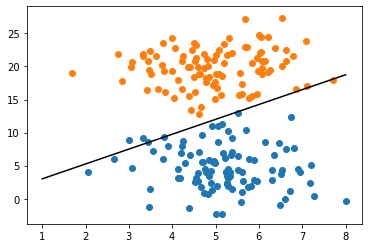

In [36]:
k = - theta[0,1] / theta[0,2]
b = - theta[0,0] / theta[0,2]
x1 = np.linspace(1, 8, 100)
x2 = k * x1 + b
plt.scatter(np.array(X[0:99,1].T), np.array(X[0:99,2].T))
plt.scatter(np.array(X[100:199,1].T), np.array(X[100:199,2].T))
plt.plot(x1, x2, color='black')
plt.show()

### array 中的 element-wise乘和矩阵乘

In [67]:
a = np.array([[1,2],[3,4]])
b = np.transpose(np.array([[1,2]]))
print(a)
print(b)
print('element-wise and broadcast1:\n', a*b)
print('element-wise and broadcast2:\n', np.multiply(a,b))
print('matrix multiplication:\n', np.dot(a,b))

[[1 2]
 [3 4]]
[[1]
 [2]]
element-wise and broadcast1:
 [[1 2]
 [6 8]]
element-wise and broadcast2:
 [[1 2]
 [6 8]]
matrix multiplication:
 [[ 5]
 [11]]
